##HW1_group4


##Imports

In [1]:
!pip install swifter

     |████████████████████████████████| 296 kB 5.3 MB/s 
     |████████████████████████████████| 132 kB 47.4 MB/s 
  Attempting uninstall: psutil
    Found existing installation: psutil 5.4.8
    Uninstalling psutil-5.4.8:
      Successfully uninstalled psutil-5.4.8


In [2]:
from pathlib import Path
import pandas as pd
import swifter
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import re
import string

#nltk
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords, wordnet
from nltk.stem.porter import *
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

##Read data

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
def read_file(path):
    dataset_path = Path(path)
    with open(dataset_path) as f:
        lines = f.readlines()

    dataset = pd.DataFrame(lines, columns=["raw_data"])
    dataset["raw_data"] = dataset["raw_data"].swifter.apply(lambda row: row.split("\t"))
    dataset = pd.DataFrame(dataset['raw_data'].to_list(), columns=['id', 'plot'])
    return dataset

In [8]:
movies = read_file('/content/drive/MyDrive/plot_summaries.txt')
movies

Pandas Apply:   0%|          | 0/42306 [00:00<?, ?it/s]

,id,plot
0,23890098,"Shlykov, a hard-working taxi driver and Lyosha..."
1,31186339,The nation of Panem consists of a wealthy Capi...
2,20663735,Poovalli Induchoodan is sentenced for six yea...
3,2231378,"The Lemon Drop Kid , a New York City swindler,..."
4,595909,Seventh-day Adventist Church pastor Michael Ch...
...,...,...
42301,34808485,"The story is about Reema , a young Muslim scho..."
42302,1096473,"In 1928 Hollywood, director Leo Andreyev look..."
42303,35102018,American Luthier focuses on Randy Parsons’ tra...
42304,8628195,"Abdur Rehman Khan , a middle-aged dry fruit se..."


##More information about data

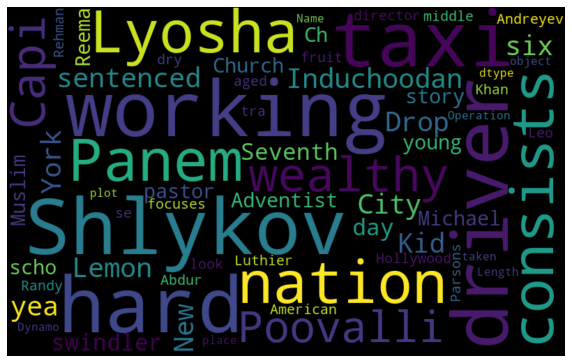

In [9]:
sentences = str(movies['plot'])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(sentences)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

##Clean data

In [10]:
def cleanData(movie):  
  #upper case to lower case
  movie['cleanPlot'] = movie['plot'].map(lambda x: x.lower())
  #remove number
  movie['cleanPlot'] = movie['cleanPlot'].map(lambda x: re.sub(r'\d+', '', x))
  #remove punctuation
  movie['cleanPlot'] = movie['cleanPlot'].map(lambda x: re.sub(r'[^a-zA-Z]', ' ', x))
  #remove whitespace
  movie['cleanPlot'] = movie['cleanPlot'].map(lambda x: x.strip())
  #remove url
  url_cleaner = 'http\S+'
  movie['cleanPlot'] = movie['cleanPlot'].map(lambda x: re.sub(url_cleaner, ' ', x))
  #removing short words
  movie['cleanPlot'] = movie['cleanPlot'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
  return movie

In [11]:
movies = cleanData(movies)
movies.head()

,id,plot,cleanPlot
0,23890098,"Shlykov, a hard-working taxi driver and Lyosha...",shlykov hard working taxi driver lyosha saxoph...
1,31186339,The nation of Panem consists of a wealthy Capi...,nation panem consists wealthy capitol twelve p...
2,20663735,Poovalli Induchoodan is sentenced for six yea...,poovalli induchoodan sentenced years prison li...
3,2231378,"The Lemon Drop Kid , a New York City swindler,...",lemon drop york city swindler illegally toutin...
4,595909,Seventh-day Adventist Church pastor Michael Ch...,seventh adventist church pastor michael chambe...


In [12]:
def tokenization(data):
  #Tokenization
  tokenized_overview = data['cleanPlot'].apply(lambda x: x.split())
  return tokenized_overview

In [13]:
tokenized_plot = tokenization(movies)
tokenized_plot.head()

0    [shlykov, hard, working, taxi, driver, lyosha,...
1    [nation, panem, consists, wealthy, capitol, tw...
2    [poovalli, induchoodan, sentenced, years, pris...
3    [lemon, drop, york, city, swindler, illegally,...
4    [seventh, adventist, church, pastor, michael, ...
Name: cleanPlot, dtype: object

In [14]:
# Removing stop words
def removeStopWord(tokenized_overview):
  stop_words = set(stopwords.words('english'))
  tokenized_overview = tokenized_overview.apply(lambda text: [word for word in text if word not in stop_words])
  return tokenized_overview

In [15]:
tokenized_plot = removeStopWord(tokenized_plot)

In [16]:
# stemming
stemmer = PorterStemmer()
tokenized_plot = tokenized_plot.apply(lambda x: [stemmer.stem(i) for i in x])
tokenized_plot.head()

0    [shlykov, hard, work, taxi, driver, lyosha, sa...
1    [nation, panem, consist, wealthi, capitol, twe...
2    [pooval, induchoodan, sentenc, year, prison, l...
3    [lemon, drop, york, citi, swindler, illeg, tou...
4    [seventh, adventist, church, pastor, michael, ...
Name: cleanPlot, dtype: object

In [17]:
# Lemmatizing the words using WordNet
def Lemmatizing(tokenized_plot):
  lemmatizer = WordNetLemmatizer()
  wordnet_map = {"N":wordnet.NOUN, "V":wordnet.VERB, "J":wordnet.ADJ, "R":wordnet.ADV}
  def lemmatize_words(text):
      pos_tagged_text = nltk.pos_tag(text)
      # pos_tagged_text = text.apply(lambda x: nltk.pos_tag(x))
      return [lemmatizer.lemmatize(word, wordnet_map.get(pos[0], wordnet.NOUN)) for word, pos in pos_tagged_text]

  tokenized_plot = tokenized_plot.apply(lambda text: lemmatize_words(text))
  return tokenized_plot

In [18]:
tokenized_plot = Lemmatizing(tokenized_plot)
tokenized_plot.head()

0    [shlykov, hard, work, taxi, driver, lyosha, sa...
1    [nation, panem, consist, wealthi, capitol, twe...
2    [pooval, induchoodan, sentenc, year, prison, l...
3    [lemon, drop, york, citi, swindler, illeg, tou...
4    [seventh, adventist, church, pastor, michael, ...
Name: cleanPlot, dtype: object

##Indexing

In [39]:
r_index = {}
for i in range(len(tokenized_plot)):
  for term in tokenized_plot[i]:
    if term not in r_index:
      r_index[term] = [movies['id'][i]]
    else:
      if movies['id'][i] not in r_index[term]:
        r_index[term].append(movies['id'][i])

In [49]:
freq_by_term = {}
for term in r_index:
  freq_by_term[term] = len(r_index[term])

In [51]:
r_index_df = pd.DataFrame({'term': r_index.keys(), 'freq': freq_by_term.values(), 'docs': r_index.values()})
# r_index_df.to_csv('/content/drive/MyDrive/plot_r_index.csv', index=False)
r_index_df.head()

,term,freq,docs
0,shlykov,1,[23890098]
1,hard,1651,"[23890098, 595909, 24225279, 8388648, 10644072..."
2,work,10458,"[23890098, 31186339, 24225279, 15401493, 14807..."
3,taxi,492,"[23890098, 28177482, 4154028, 32558509, 350306..."
4,driver,1514,"[23890098, 24225279, 5425205, 33417831, 325585..."


In [56]:
input_word = input()
flag = 0
for i in range(len(r_index_df)):
  if input_word == r_index_df['term'][i]:
    print(r_index_df.iloc[i])
    flag = 1
    break

if flag == 0:
  print("No document contains the entered word!")

driver
term                                               driver
freq                                                 1514
docs    [23890098, 24225279, 5425205, 33417831, 325585...
Name: 4, dtype: object
